In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ford.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17966 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17966 non-null  object 
 1   year          17966 non-null  int64  
 2   price         17966 non-null  int64  
 3   transmission  17966 non-null  object 
 4   mileage       17966 non-null  int64  
 5   fuelType      17966 non-null  object 
 6   tax           17966 non-null  int64  
 7   mpg           17966 non-null  float64
 8   engineSize    17966 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 1.2+ MB


In [5]:
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000,17966.000000
mean,2016.866470,12279.534844,23362.608761,113.329456,57.906980,1.350807
std,2.050336,4741.343657,19472.054349,62.012456,10.125696,0.432367
min,1996.000000,495.000000,1.000000,0.000000,20.800000,0.000000
25%,2016.000000,8999.000000,9987.000000,30.000000,52.300000,1.000000
50%,2017.000000,11291.000000,18242.500000,145.000000,58.900000,1.200000
75%,2018.000000,15299.000000,31060.000000,145.000000,65.700000,1.500000
max,2060.000000,54995.000000,177644.000000,580.000000,201.800000,5.000000


In [6]:
col = ['model','year','transmission','fuelType', 'tax','mpg', 'engineSize']
for i in col:
    print("="*40,i,"="*40)
    print("Unique Count -> ",df[i].nunique())
    print(df[i].unique())

======================================== model ========================================
Unique Count ->  24
[' Fiesta' ' Focus' ' Puma' ' Kuga' ' EcoSport' ' C-MAX' ' Mondeo' ' Ka+'
 ' Tourneo Custom' ' S-MAX' ' B-MAX' ' Edge' ' Tourneo Connect'
 ' Grand C-MAX' ' KA' ' Galaxy' ' Mustang' ' Grand Tourneo Connect'
 ' Fusion' ' Ranger' ' Streetka' ' Escort' ' Transit Tourneo' 'Focus']
======================================== year ========================================
Unique Count ->  23
[2017 2018 2019 2015 2014 2016 2013 2020 2012 2008 2010 2009 2011 1998
 2007 2005 2006 2002 2003 1996 2004 2000 2060]
======================================== transmission ========================================
Unique Count ->  3
['Automatic' 'Manual' 'Semi-Auto']
======================================== fuelType ========================================
Unique Count ->  5
['Petrol' 'Diesel' 'Hybrid' 'Electric' 'Other']
======================================== tax ======================================

##### 1. There is Duplicate entry in model as Focus

In [7]:
df['model'] = df['model'].str.strip().str.title()

In [8]:
df['model'].unique()

array(['Fiesta', 'Focus', 'Puma', 'Kuga', 'Ecosport', 'C-Max', 'Mondeo',
       'Ka+', 'Tourneo Custom', 'S-Max', 'B-Max', 'Edge',
       'Tourneo Connect', 'Grand C-Max', 'Ka', 'Galaxy', 'Mustang',
       'Grand Tourneo Connect', 'Fusion', 'Ranger', 'Streetka', 'Escort',
       'Transit Tourneo'], dtype=object)

##### 2. In Year Column there is an Outlier as 2060

In [9]:
df[(df['year'] >2026)]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4


In [10]:
df[
    (df['model'] == 'Fiesta') &
    (df['price'].between(6000, 7000))
]


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
24,Fiesta,2014,6795,Manual,35299,Petrol,0,65.7,1.0
50,Fiesta,2016,6000,Manual,47613,Petrol,0,65.7,1.0
53,Fiesta,2016,6395,Manual,31562,Petrol,125,54.3,1.2
73,Fiesta,2014,6360,Manual,48653,Petrol,0,65.7,1.0
74,Fiesta,2014,6270,Manual,60888,Petrol,0,65.7,1.0
...,...,...,...,...,...,...,...,...,...
17622,Fiesta,2013,7000,Manual,33533,Petrol,0,65.7,1.0
17667,Fiesta,2016,6950,Manual,44545,Petrol,125,54.3,1.2
17726,Fiesta,2060,6495,Automatic,54807,Petrol,205,42.8,1.4
17784,Fiesta,2013,6000,Manual,58246,Petrol,30,54.3,1.2


In [11]:
mode_year = df[
    (df['model'] == 'Fiesta') &
    (df['price'] > 6000) &
    (df['price'] < 7000)
]['year'].mode()

mode_year


0    2014
Name: year, dtype: int64

In [12]:
df['year'].value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     805
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2003       3
2002       3
1998       1
1996       1
2000       1
2060       1
Name: count, dtype: int64

In [13]:
mode_year # --> Data Type = np.int

0    2014
Name: year, dtype: int64

In [14]:
mode_year = mode_year.iloc[0]  # *Needed
df.loc[df['year'] > 2026, 'year'] = mode_year

In [15]:
df['year'].value_counts()

year
2017    4888
2018    4014
2019    3194
2016    2331
2015    1368
2014     806
2013     609
2020     258
2012     115
2011      94
2009      91
2010      67
2008      57
2007      32
2005      16
2006      13
2004       4
2002       3
2003       3
1998       1
1996       1
2000       1
Name: count, dtype: int64

##### 3. High Taxed Car (keep if they are expensive with large Engine Size)

In [16]:
df[df['tax'] > 400][['tax','model', 'engineSize', 'fuelType', 'year', 'tax']]


,tax,model,engineSize,fuelType,year,tax
364,570,Mustang,5.0,Petrol,2016,570
3163,580,Mustang,5.0,Petrol,2017,580
3395,570,Mustang,5.0,Petrol,2017,570
3687,570,Mustang,5.0,Petrol,2016,570
6136,570,Mustang,5.0,Petrol,2016,570
9790,570,Mustang,5.0,Petrol,2016,570
11097,580,Mustang,5.0,Petrol,2016,580
12400,570,Mustang,5.0,Petrol,2017,570
13741,555,Kuga,2.5,Petrol,2012,555
14910,555,Kuga,2.5,Petrol,2012,555


##### mpg for petrol/diesel -> (max upto 100-110) , if more then fuelType -> electric | hybrid


In [17]:
df[df['mpg'] > 100][['mpg','model', 'fuelType', 'engineSize']]

,mpg,model,fuelType,engineSize
6153,201.8,Kuga,Hybrid,2.5
6536,201.8,Kuga,Hybrid,2.5
9220,201.8,Kuga,Hybrid,2.5
12862,201.8,Kuga,Hybrid,2.5
13730,201.8,Kuga,Hybrid,2.5


In [18]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [19]:
duplicates_all = df[df.duplicated(keep=False)]
duplicates_all


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
25,Focus,2017,18499,Manual,13063,Petrol,145,41.5,2.0
27,Fiesta,2015,8299,Manual,25935,Petrol,0,65.7,1.0
28,Fiesta,2018,12499,Manual,8700,Petrol,145,58.9,1.0
113,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
159,Focus,2016,10995,Manual,30923,Diesel,0,74.3,1.5
...,...,...,...,...,...,...,...,...,...
15127,Ecosport,2019,16799,Automatic,433,Petrol,150,45.6,1.0
15684,Ka,2008,1795,Manual,63000,Petrol,160,45.6,1.3
15685,Ka,2008,1795,Manual,63000,Petrol,160,45.6,1.3
17607,B-Max,2017,11495,Automatic,5000,Petrol,145,44.1,1.6


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.duplicated().sum()

np.int64(0)

### Visual Analysis

1. What is the shape of our inventory? Are we selling mostly budget or premium cars?

In [22]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='price', ylabel='Count'>

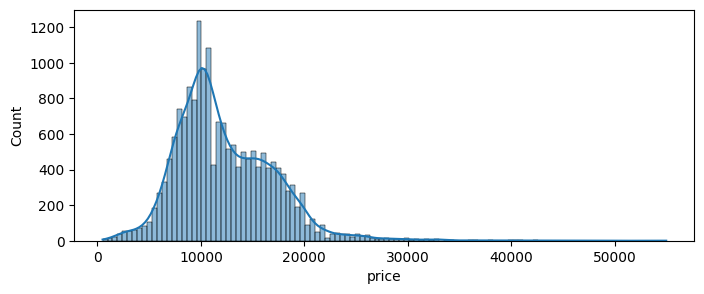

In [23]:
# 1. Car Price Distribution -> Right Skewed Distribution
plt.figure(figsize=(8,3))
sns.histplot(df['price'],kde=True)

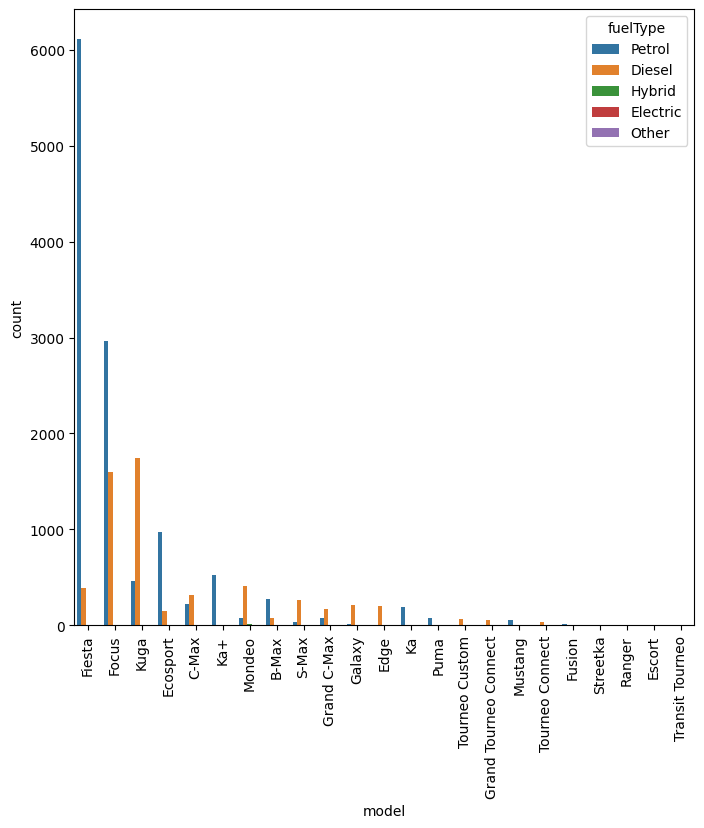

In [24]:

plt.figure(figsize=(8,8))
sns.countplot(
    x='model',
    data=df,
    hue='fuelType',   # or 'transmission'
    order=df['model'].value_counts().index
)
plt.xticks(rotation=90)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

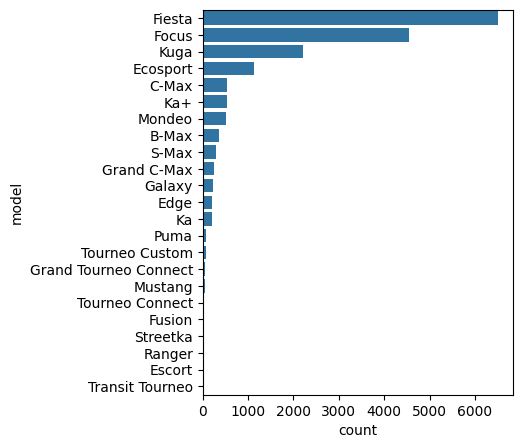

In [25]:
# which Car Model Dominate the Car Stock
plt.figure(figsize=(4,5))
sns.countplot(df['model'],order=df['model'].value_counts().index)
# plt.xticks(rotation=90) Model on X
plt.show

<Axes: xlabel='count', ylabel='fuelType'>

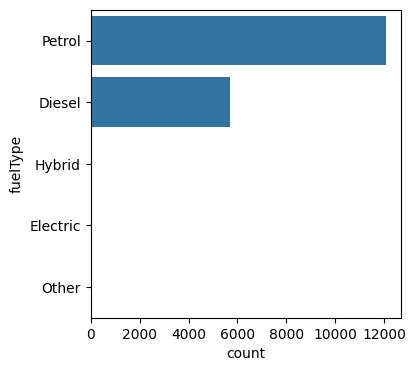

In [26]:
# 3. 
plt.figure(figsize=(4,4))
sns.countplot(df['fuelType'],)

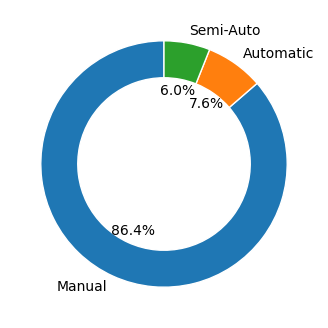

In [27]:
# 3. 
plt.figure(figsize=(4,4))
Transmission_Count = df['transmission'].value_counts()
plt.pie(x=Transmission_Count.values,
        labels=Transmission_Count.index,
        autopct="%1.1f%%",
        startangle=90,
        wedgeprops=dict(width = 0.3,edgecolor="white"))
plt.show()

2. What features actually justify a higher price tag?

<Axes: xlabel='mileage', ylabel='price'>

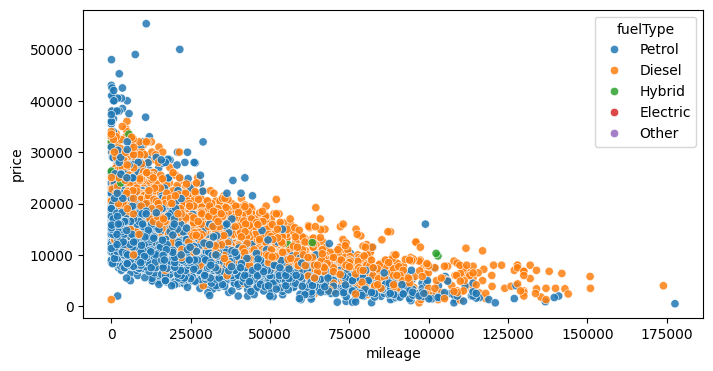

In [28]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df,x='mileage',y='price',hue='fuelType',alpha=0.85)

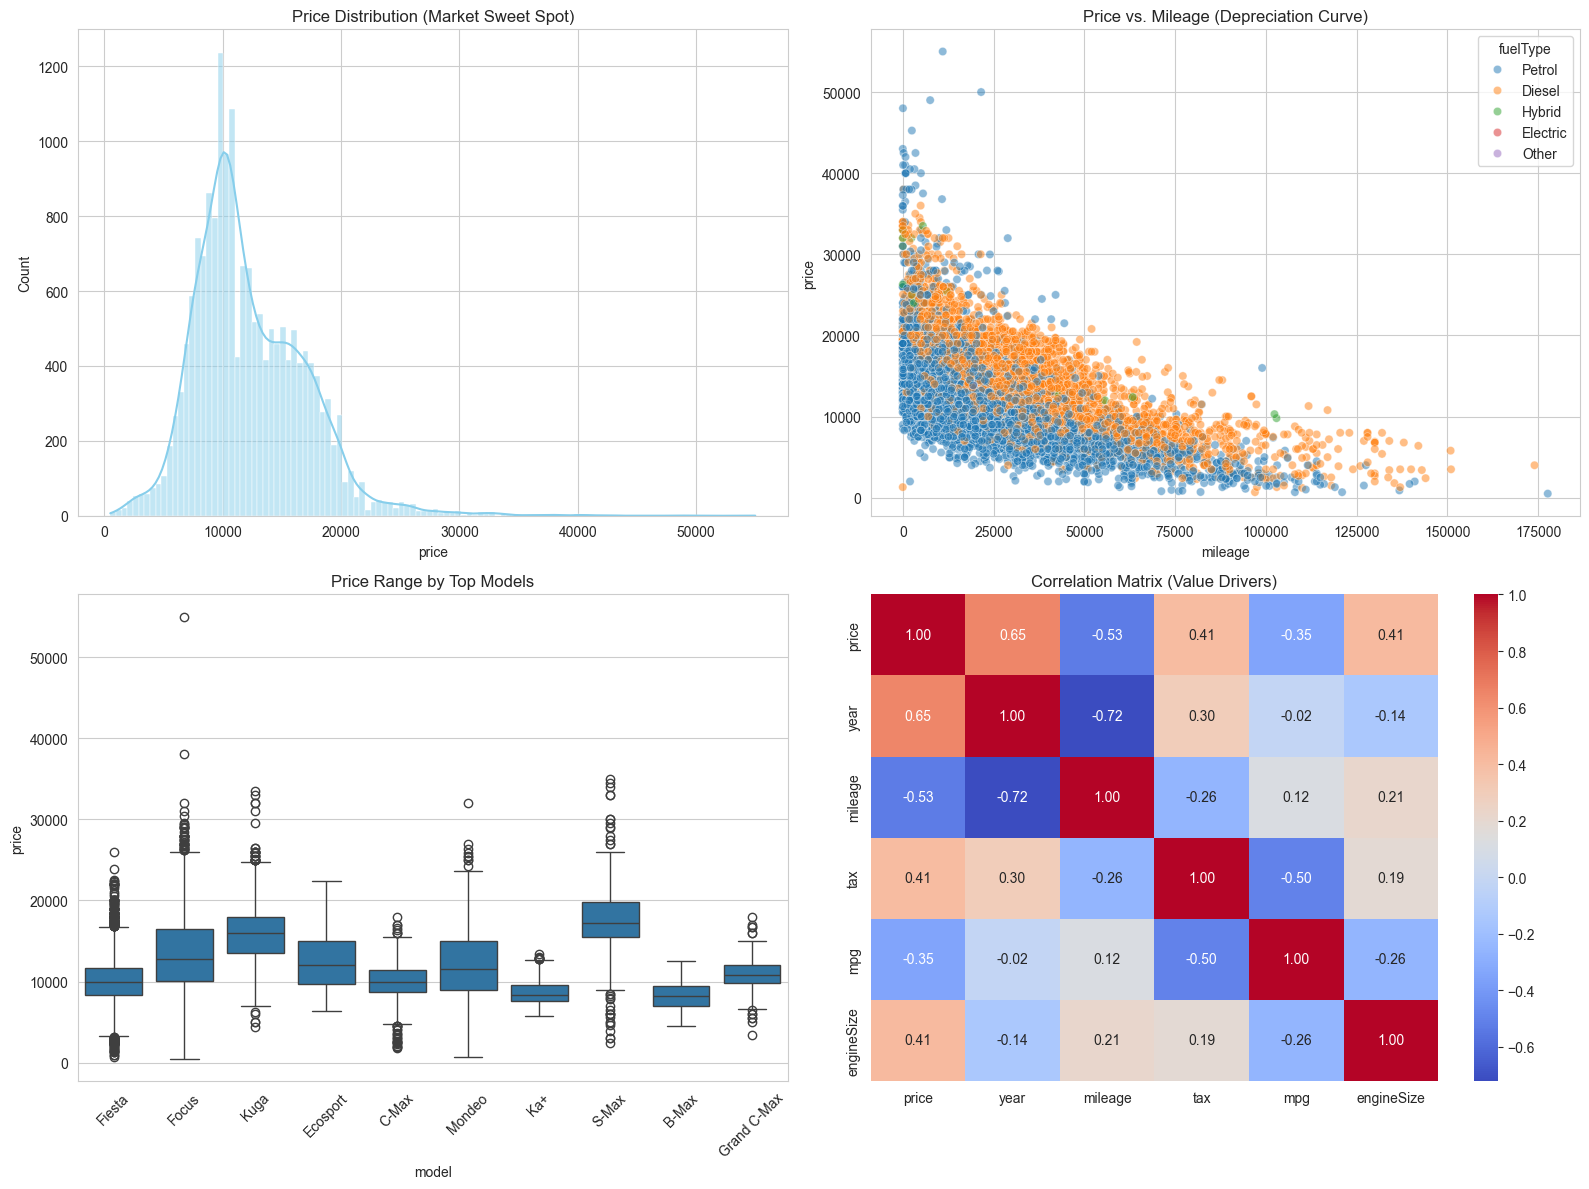

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# 0. Clean the data (Crucial step based on your previous query)
df['model'] = df['model'].str.strip() 

# Set visuals
sns.set_style("whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# 1. Price Distribution
sns.histplot(df['price'], kde=True, ax=axs[0, 0], color='skyblue')
axs[0, 0].set_title('Price Distribution (Market Sweet Spot)')

# 2. Price vs Mileage (Depreciation)
sns.scatterplot(data=df, x='mileage', y='price', hue='fuelType', alpha=0.5, ax=axs[0, 1])
axs[0, 1].set_title('Price vs. Mileage (Depreciation Curve)')

# 3. Price by Model (Segmentation)
# Get top 10 models to keep chart readable
top_models = df['model'].value_counts().nlargest(10).index
sns.boxplot(data=df[df['model'].isin(top_models)], x='model', y='price', ax=axs[1, 0])
axs[1, 0].tick_params(axis='x', rotation=45)
axs[1, 0].set_title('Price Range by Top Models')

# 4. Correlation Heatmap (Drivers)
# Select only numeric columns for correlation
numeric_cols = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f", ax=axs[1, 1])
axs[1, 1].set_title('Correlation Matrix (Value Drivers)')

plt.tight_layout()
plt.show()

In [30]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

<Axes: xlabel='mpg', ylabel='price'>

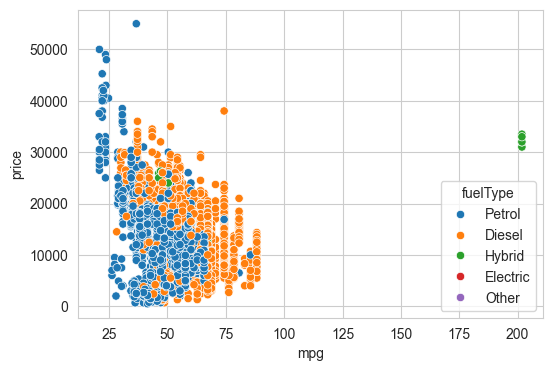

In [31]:
# Engine Size Vs mpg (efficieny)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='mpg',y='price',hue='fuelType')

<Axes: xlabel='mpg', ylabel='engineSize'>

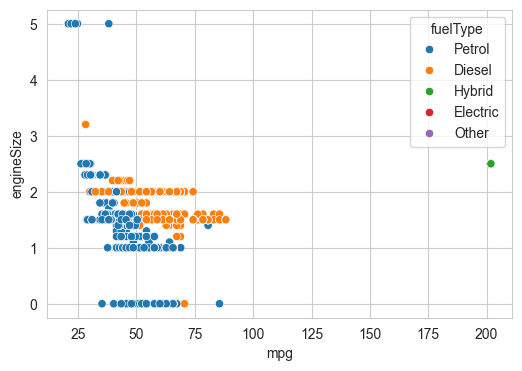

In [32]:
# Engine Size Vs mpg (efficieny)
plt.figure(figsize=(6,4))
sns.scatterplot(data=df,x='mpg',y='engineSize',hue='fuelType')

## Blunder -> EngineSize = 0 (Not Possible)

In [33]:
df[(df['engineSize'] == 0)].shape

(51, 9)

In [34]:
df[(df['engineSize'] == 0)].head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13862,Kuga,2019,18990,Manual,8389,Petrol,150,35.3,0.0
14064,Focus,2016,15500,Manual,28344,Diesel,20,67.3,0.0
14082,Focus,2015,14300,Manual,40457,Diesel,20,67.3,0.0
15343,Ka,2018,10000,Manual,10051,Petrol,150,43.5,0.0
15500,Ecosport,2015,8500,Manual,33403,Diesel,30,61.4,0.0


In [35]:
print("Length of Faulty data :",len(df[(df['engineSize'] == 0)]))
print("Total Data Size : ",len(df))
print("Total Error in % :",(len(df[(df['engineSize'] == 0)])/len(df))*100)
## as < 3% so dorping them is fine Not Major Consequences or Trade Off

Length of Faulty data : 51
Total Data Size :  17812
Total Error in % : 0.28632382663373007


In [36]:
# 1. Replace 0.0 with NaN (so Python knows it's missing)
df['engineSize'] = df['engineSize'].replace(0, np.nan)

# 2. Fill NaN with the median engine size of the same Model + Fuel Type
# We group by 'model' and 'fuelType' so we don't accidentally give a Fiesta engine to a Mustang.
df['engineSize'] = df['engineSize'].fillna(
    df.groupby(['model', 'fuelType'])['engineSize'].transform('median')
)

# 3. Final Check: Did we miss any? (Some unique models might still be NaN if they were the ONLY one)
print("Remaining missing values:", df['engineSize'].isna().sum())

# If any remain (very rare), fill them with the overall median
df['engineSize'] = df['engineSize'].fillna(df['engineSize'].median())

Remaining missing values: 1


In [37]:
print("Remaining missing values:", df['engineSize'].isna().sum())

Remaining missing values: 0


In [38]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Fiesta,2017,12000,Automatic,15944,Petrol,150,57.7,1.0
1,Focus,2018,14000,Manual,9083,Petrol,150,57.7,1.0
2,Focus,2017,13000,Manual,12456,Petrol,150,57.7,1.0
3,Fiesta,2019,17500,Manual,10460,Petrol,145,40.3,1.5
4,Fiesta,2019,16500,Automatic,1482,Petrol,145,48.7,1.0
...,...,...,...,...,...,...,...,...,...
17961,B-Max,2017,8999,Manual,16700,Petrol,150,47.1,1.4
17962,B-Max,2014,7499,Manual,40700,Petrol,30,57.7,1.0
17963,Focus,2015,9999,Manual,7010,Diesel,20,67.3,1.6
17964,Ka,2018,8299,Manual,5007,Petrol,145,57.7,1.2


### Feature Engineering ...

1. Encoding...
- we will be doing one hot encoding on 'Model' , 'Transmission' , 'fuelType' .
- Resaon -> We Have 23 Unique Items in Model , if done label encoding the giving a specific Numercal No. for each unique model then . 
- ML model while learning may become bias to those model having larger numerical value .

In [39]:
X = df.drop('price',axis=1)

In [40]:
Y = df['price']

1. First Split the Data

In [41]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(
    X,Y,
    test_size=0.2,
    random_state=42,
    shuffle=True,
)

2. Data Transformation/Encoding

In [42]:
needEncoding = ['model','transmission','fuelType']

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ct = make_column_transformer(
    (OneHotEncoder(
        handle_unknown='ignore',
        sparse_output=False,
    ),
    needEncoding,
    ),
    remainder='passthrough',
    verbose_feature_names_out=False # Optional: keeps names short ('model_Fiesta' instead of 'onehotencoder__model_Fiesta')
)


ct.set_output(transform='pandas')

x_train_encoded = ct.fit_transform(x_train)
x_test_encoded = ct.transform(x_test)

3. Feature Scaling / Standardization

- this Scales everything 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# 1. Fit AND Transform the training data
x_train_scaled = scaler.fit_transform(x_train_encoded)

# 2. ONLY Transform the test data (do NOT re-fit)
x_test_scaled = scaler.transform(x_test_encoded)


- this Scales Only Desired Columns 

In [51]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# Define which columns to scale by name or index
cols_to_scale = ['year', 'mileage', 'tax', 'mpg']

# Create the transformer
ct = ColumnTransformer([
    ('scl', StandardScaler(), cols_to_scale)
], remainder='passthrough') # 'passthrough' keeps other columns untouched

ct.set_output(transform='pandas')

# Apply to your data
x_train_scaled = ct.fit_transform(x_train_encoded)
x_test_scaled = ct.transform(x_test_encoded)


In [55]:
x_train_scaled.head()

,scl__year,scl__mileage,scl__tax,scl__mpg,remainder__model_B-Max,remainder__model_C-Max,remainder__model_Ecosport,remainder__model_Edge,remainder__model_Escort,remainder__model_Fiesta,...,remainder__model_Transit Tourneo,remainder__transmission_Automatic,remainder__transmission_Manual,remainder__transmission_Semi-Auto,remainder__fuelType_Diesel,remainder__fuelType_Electric,remainder__fuelType_Hybrid,remainder__fuelType_Other,remainder__fuelType_Petrol,remainder__engineSize
1595,0.073768,-0.043268,-1.837524,0.761097,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1403,1.053834,-0.880214,0.510118,0.213330,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7604,-1.886364,0.204849,-1.837524,0.761097,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
7966,-1.886364,1.755245,-1.351805,0.340490,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.6
8930,0.563801,-0.395766,0.591071,0.761097,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0


### Why Encoding + Standardization Are Done Together

Use a **ColumnTransformer** to bundle all preprocessing steps.

**Benefits with examples:**

- **Prevents Data Leakage**  
  Scaling stats (mean/std) and encoding categories are learned only from `X_train`, then reused on `X_test`.

- **Clean Code**  
  Instead of:
  - `X_train_encoded`
  - `X_train_scaled`
  - `X_train_final`  
  You use:
  - `X_train_processed`

- **Production Ready**  
  ```python
  model.predict(new_raw_car_data)


In [58]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# 1. Define which columns go where
# (Double check these names match your dataframe exactly)
numerical_cols = ['mileage', 'tax', 'mpg', 'engineSize', 'year']
categorical_cols = ['model', 'transmission', 'fuelType']

# 2. Create the "Master Processor"
preprocessor = ColumnTransformer(
    transformers=[
        # Step A: Scale the numbers
        ('num', StandardScaler(), numerical_cols),

        # Step B: Encode the categories
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ],
    # Step C: Drop anything else (like 'price' if it's still in X)
    remainder='drop' 
)

preprocessor.set_output(transform='pandas')

# 3. Apply it (The Magic)
# Fit ONLY on Train, then Transform both
x_train_processed = preprocessor.fit_transform(x_train)
x_test_processed = preprocessor.transform(x_test)

# 4. (Optional) Convert back to DataFrame to see the result with names
# Note: Newer sklearn versions support this natively with `preprocessor.set_output(transform='pandas')`

In [60]:
x_train_processed.head()

,num__mileage,num__tax,num__mpg,num__engineSize,num__year,cat__model_B-Max,cat__model_C-Max,cat__model_Ecosport,cat__model_Edge,cat__model_Escort,...,cat__model_Tourneo Custom,cat__model_Transit Tourneo,cat__transmission_Automatic,cat__transmission_Manual,cat__transmission_Semi-Auto,cat__fuelType_Diesel,cat__fuelType_Electric,cat__fuelType_Hybrid,cat__fuelType_Other,cat__fuelType_Petrol
1595,-0.043268,-1.837524,0.761097,-0.839561,0.073768,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1403,-0.880214,0.510118,0.213330,-0.839561,1.053834,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7604,0.204849,-1.837524,0.761097,-0.839561,-1.886364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
7966,1.755245,-1.351805,0.340490,0.582112,-1.886364,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
8930,-0.395766,0.591071,0.761097,1.529894,0.563801,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
